In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import json
import argparse
import torch
from tqdm import tqdm
import data_loader.data_loaders as module_data
import model.loss as module_loss
import model.metric as module_metric
import model.model as module_arch
from trainer import Trainer
from utils import Logger
import importlib
import math
import torchvision
print("Modules loaded")

importlib.reload(module_data) #load recent changes to data_loaders.py
importlib.reload(module_arch)
print("Reload complete")

print("GPUs available: " + str(torch.cuda.device_count()))

Modules loaded
Reload complete
GPUs available: 0


In [5]:
#This function gets the parameters from the config.json file 
def get_instance(module, name, config, *args):
    return getattr(module, config[name]['type'])(*args, **config[name]['args'])

def main(config, resume):
    train_logger = Logger() #uses entries to store training performance metrics

    # setup data_loader instances
    data_loader = get_instance(module_data, 'data_loader', config) #looks in data_loader/data_loaders.py for 'MNISTDataLoader'
    print("Total number of training images = " + str(data_loader.dataset.data_len))
    valid_data_loader = data_loader.split_validation() #allocate some images as validation

    # build model architecture
    model = get_instance(module_arch, 'arch', config) #looks in the model/model.py for 'MnistModel', as specified by config
    print(model)
    
    if torch.cuda.is_available():
        print("Using GPU: " + torch.cuda.get_device_name(0))
    else:
        print("Using CPU to train")
    
    #visualizeDataset(data_loader)
    visualize1(data_loader)
    
    # get function handles of loss and metrics
    loss = getattr(module_loss, config['loss']) #looks in model/loss.py for 'nll_loss'
    metrics = [getattr(module_metric, met) for met in config['metrics']] #get all the metrics in model/metrics.py - default is accuracy and top 3 accuracy

    # build optimizer, learning rate scheduler. delete every lines containing lr_scheduler for disabling scheduler
    trainable_params = filter(lambda p: p.requires_grad, model.parameters()) #Number of training params
    optimizer = get_instance(torch.optim, 'optimizer', config, trainable_params)
    lr_scheduler = get_instance(torch.optim.lr_scheduler, 'lr_scheduler', config, optimizer)

    trainer = Trainer(model, loss, metrics, optimizer,
                      resume=resume, #choose a previous epoch to start training from
                      config=config,
                      data_loader=data_loader,
                      valid_data_loader=valid_data_loader,
                      lr_scheduler=lr_scheduler,
                      train_logger=train_logger)

    trainer.train()

def visualizeDataset(dataloader):
    images, labels = next(iter(dataloader))
    plt.imshow(torchvision.utils.make_grid(images, nrow=8).permute(1, 2, 0))
    
def visualize1(dataloader):
    images, labels = next(iter(dataloader))
    #print(images.shape)
    #print(labels)
    fig = plt.figure(figsize=(40, 40))
    batch = math.ceil(math.sqrt(dataloader.batch_size))
    for i in range(len(images)):
        a = fig.add_subplot(batch,batch,i+1)
        img = images[i].permute(1,2,0).numpy()
        img = np.squeeze(img)
        imgplot = plt.imshow(img, cmap = "gray")
        plt.axis('off')
        a.set_title("Label = " +str(labels[i].numpy()), fontsize=30)

In [6]:
config_file = 'config_groundTruth.json' 

##
# .json file contains a data_loader_test, which should point to a separate test images folder, NOT the same training folder
##

# load config file
with open(config_file) as handle:
    config = json.load(handle)
# setting path to save trained models and log files
path = os.path.join(config['trainer']['save_dir'], config['name'])

Total number of training images = 546
groundTruthModel(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=2, bias=True)
)
Trainable parameters: 21432
Using CPU to train


Train Epoch: 1 [0/492 (0%)] Loss: 33.751617
Train Epoch: 1 [160/492 (31%)] Loss: 16.061802
Train Epoch: 1 [320/492 (62%)] Loss: 12.016293
Train Epoch: 1 [480/492 (94%)] Loss: 8.202464
    val_loss       : 5.156327247619629
    val_my_metric  : 0.515625
    loss           : 18.49678409099579
    epoch          : 1
    my_metric      : 0.4518229166666667
Saving checkpoint: saved/GroundTruthMNIST/0523_221535/checkpoint-epoch1.pth ...
Saving current best: model_best.pth ...
Train Epoch: 2 [0/492 (0%)] Loss: 9.469828
Train Epoch: 2 [160/492 (31%)] Loss: 8.361024
Train Epoch: 2 [320/492 (62%)] Loss: 4.589154
Train Epoch: 2 [480/492 (94%)] Loss: 3.785835
    val_loss       : 1.3945228457450867
    val_my_metric  : 0.4446022727272727
    loss           : 6.714234903454781
    epoch          : 2
    my_metric      : 0.4921875
Saving checkpoint: saved/GroundTruthMNIST/0523_221535/checkpoint-epoch2.pth ...
Saving current best: model_best.pth ...
Train Epoch: 3 [0/492 (0%)] Loss: 4.050833
Train Ep

    loss           : 0.7714911848306656
    epoch          : 18
    my_metric      : 0.634765625
Saving checkpoint: saved/GroundTruthMNIST/0523_221535/checkpoint-epoch18.pth ...
Saving current best: model_best.pth ...
Train Epoch: 19 [0/492 (0%)] Loss: 0.655518
Train Epoch: 19 [160/492 (31%)] Loss: 0.761714
Train Epoch: 19 [320/492 (62%)] Loss: 0.696753
Train Epoch: 19 [480/492 (94%)] Loss: 0.626812
    val_loss       : 0.6431129574775696
    val_my_metric  : 0.7357954545454546
    loss           : 0.7143675871193409
    epoch          : 19
    my_metric      : 0.6315104166666666
Saving checkpoint: saved/GroundTruthMNIST/0523_221535/checkpoint-epoch19.pth ...
Train Epoch: 20 [0/492 (0%)] Loss: 0.677210
Train Epoch: 20 [160/492 (31%)] Loss: 0.787989
Train Epoch: 20 [320/492 (62%)] Loss: 0.723160
Train Epoch: 20 [480/492 (94%)] Loss: 0.603510
    val_loss       : 0.6142657995223999
    val_my_metric  : 0.6832386363636364
    loss           : 0.7333281449973583
    epoch          : 20
   

    epoch          : 36
    my_metric      : 0.673828125
Saving checkpoint: saved/GroundTruthMNIST/0523_221535/checkpoint-epoch36.pth ...
Train Epoch: 37 [0/492 (0%)] Loss: 0.590532
Train Epoch: 37 [160/492 (31%)] Loss: 0.690766
Train Epoch: 37 [320/492 (62%)] Loss: 0.569050
Train Epoch: 37 [480/492 (94%)] Loss: 0.659444
    val_loss       : 0.6236020624637604
    val_my_metric  : 0.6846590909090908
    loss           : 0.6639984212815762
    epoch          : 37
    my_metric      : 0.6627604166666666
Saving checkpoint: saved/GroundTruthMNIST/0523_221535/checkpoint-epoch37.pth ...
Train Epoch: 38 [0/492 (0%)] Loss: 0.744509
Train Epoch: 38 [160/492 (31%)] Loss: 0.708804
Train Epoch: 38 [320/492 (62%)] Loss: 0.712920
Train Epoch: 38 [480/492 (94%)] Loss: 0.655500
    val_loss       : 0.6373077034950256
    val_my_metric  : 0.6775568181818181
    loss           : 0.6580277755856514
    epoch          : 38
    my_metric      : 0.6634114583333334
Validation performance didn't improve for 1

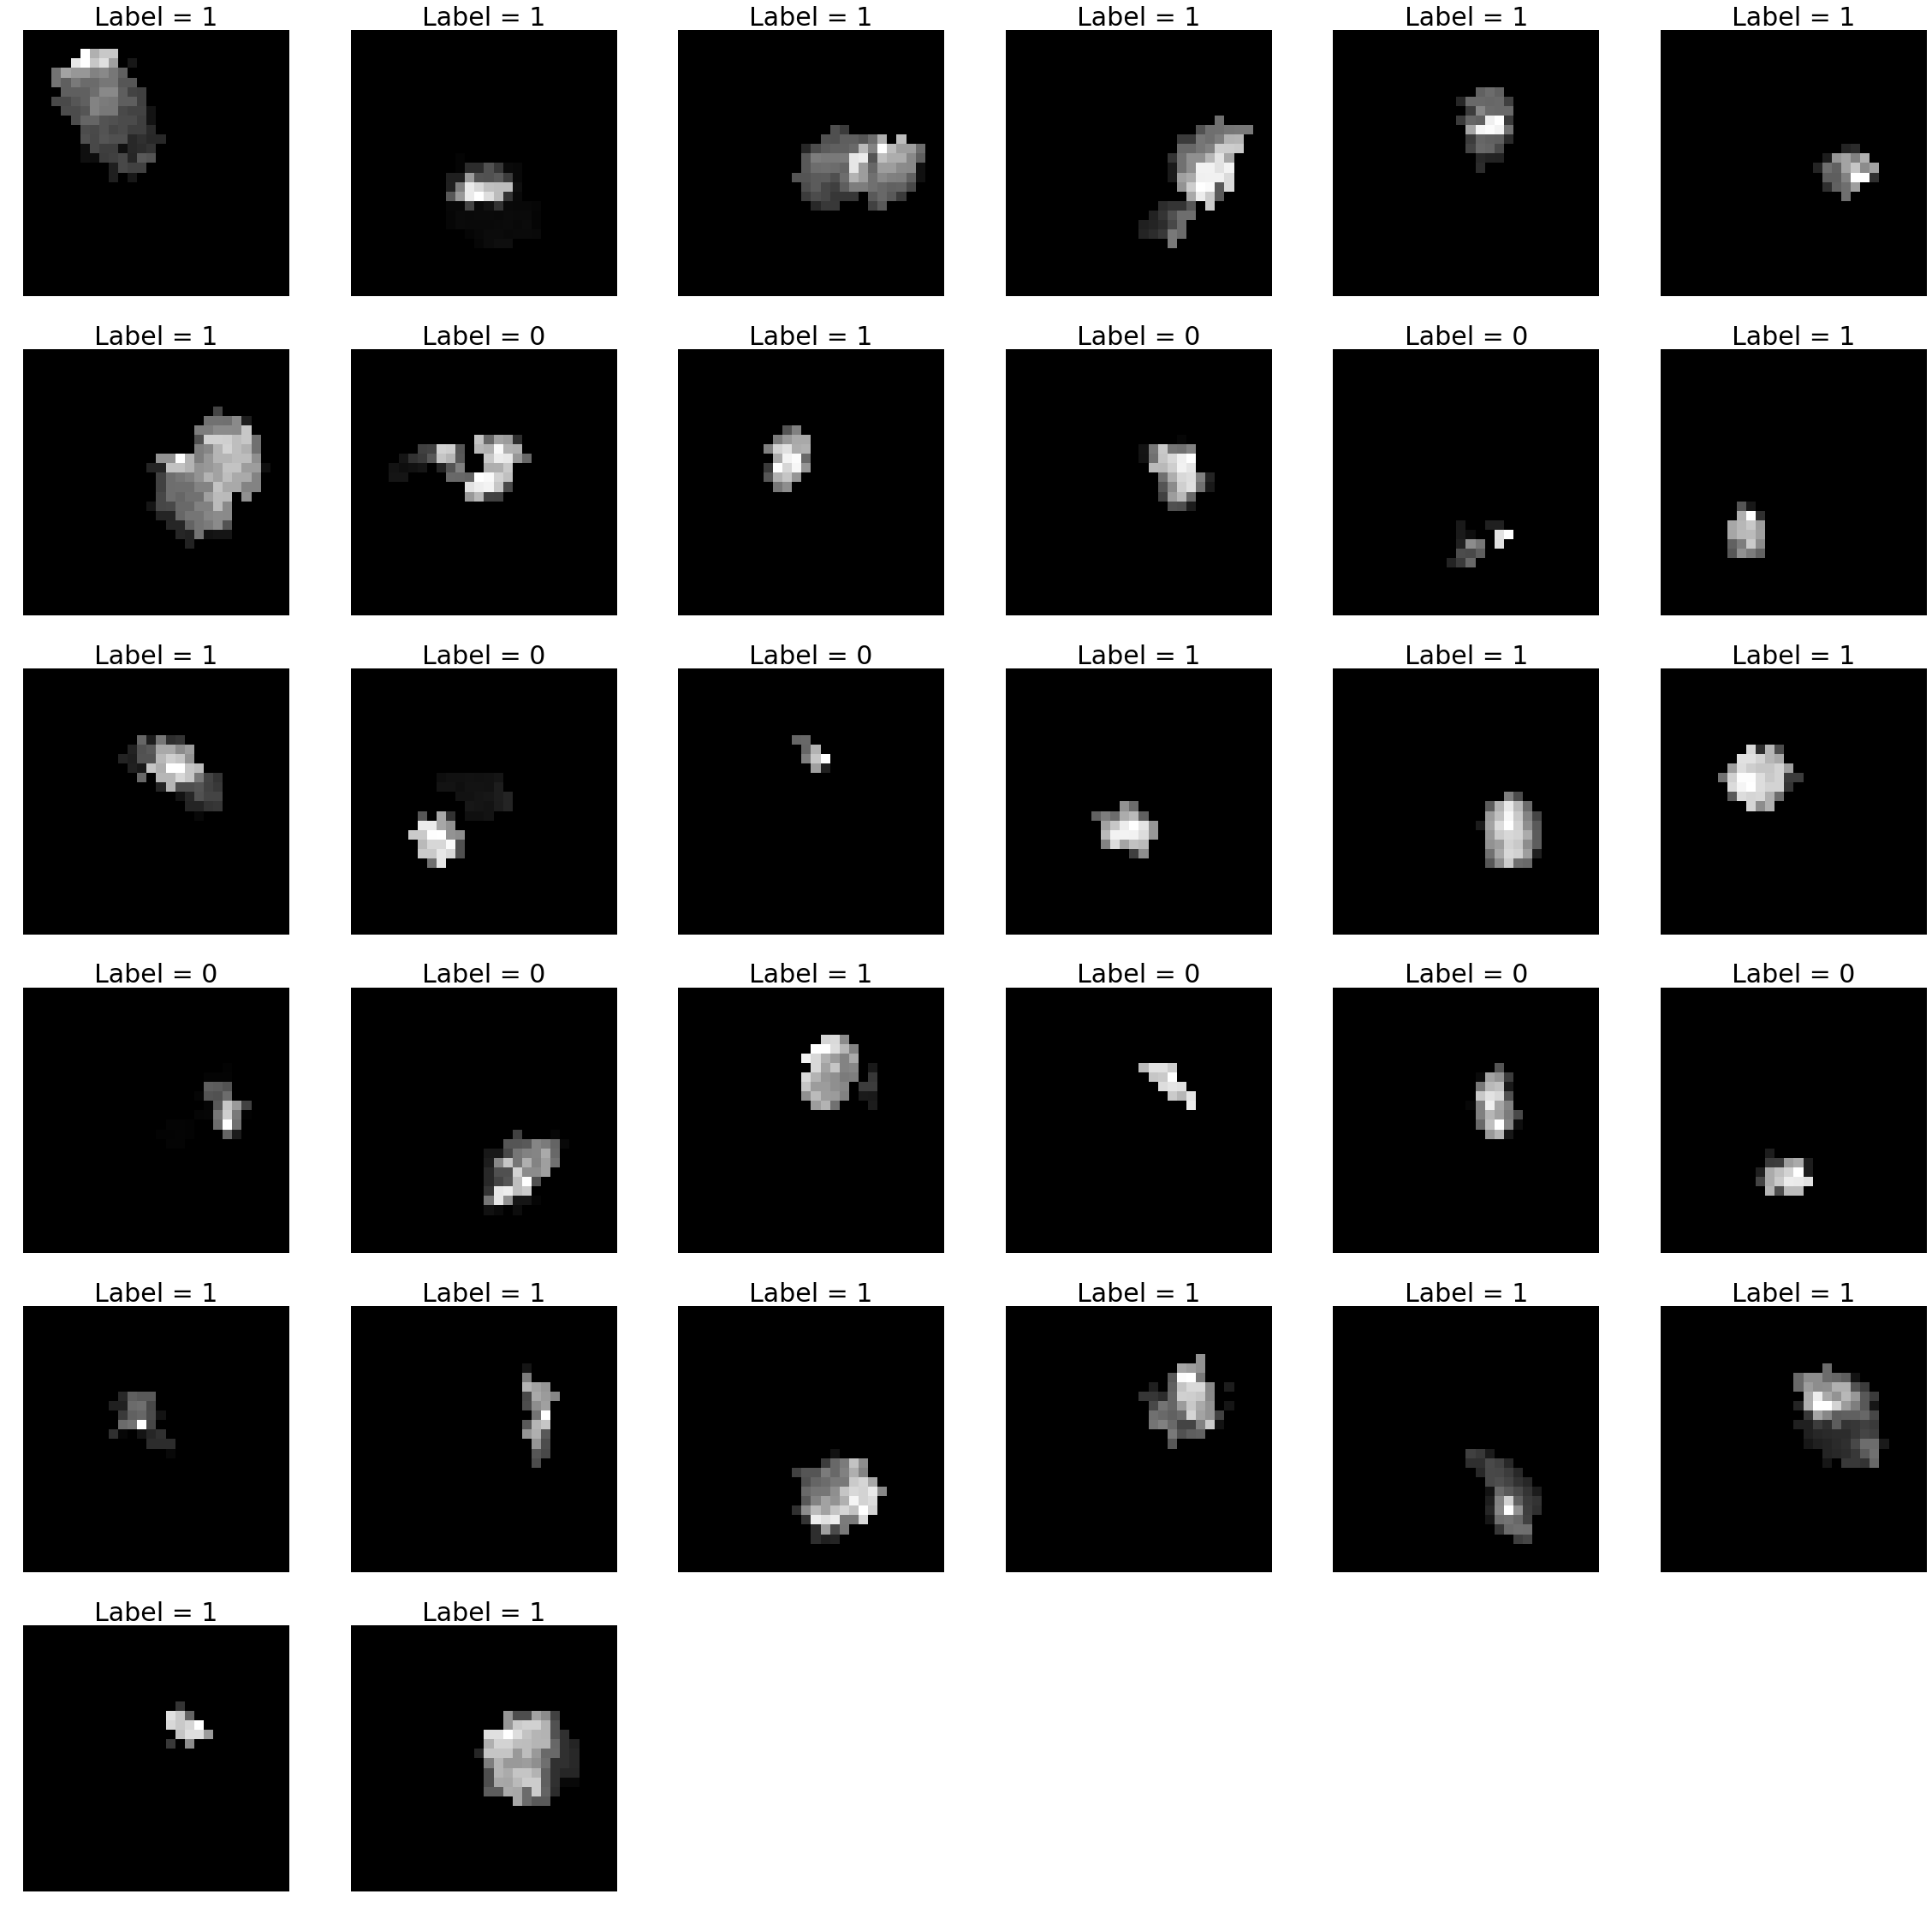

In [7]:
#Train the network
main(config, None)

In [9]:
def visualizationOutGray(data, output, target, classes):
    ig = plt.figure()
    output_cpu = output.to(torch.device("cpu"))
    target_cpu = target.to(torch.device("cpu"))
    output_idx = (np.argmax(output_cpu[0], axis=0)) #reverse one hot
    cls = classes[output_idx]
    plt.title("Prediction = " + str(cls) + " | Actual = " + str(classes[target_cpu[0].numpy()]) )
    data_cpu = data.to(torch.device("cpu"))
    img = data_cpu[0]
    plt.imshow(np.transpose(np.reshape(img, (1,28,28)), (1,2,0)).squeeze(), cmap = 'gray') # realign    
    

def main2(config, resume):
    # setup data_loader instances
    data_loader = get_instance(module_data, 'data_loader_test', config)
    '''
    
    data_loader = getattr(module_data, config['data_loader']['type'])(
        config['data_loader']['args']['data_dir'],
        batch_size=1,
        shuffle=False,
        validation_split=0.0,
        training=False,
        num_workers=2
    )
    '''
    # build model architecture
    model = get_instance(module_arch, 'arch', config)
    print(model)
    print(torch.cuda.get_device_name(0))


    
    # get function handles of loss and metrics
    loss_fn = getattr(module_loss, config['loss'])
    metric_fns = [getattr(module_metric, met) for met in config['metrics']]
    
    # load state dict
    checkpoint = torch.load(resume)
    state_dict = checkpoint['state_dict'] #dictionary of model parameters from saved file
    if config['n_gpu'] > 1:
        model = torch.nn.DataParallel(model)
    model.load_state_dict(state_dict) 
    
    # prepare model for testing
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    model.eval() #tells model to ignore dropout and batch normalization
    
    total_loss = 0.0
    total_metrics = torch.zeros(len(metric_fns))
    
    classes = ('class1', 'class2')
    
    with torch.no_grad(): #speed up calculations, unable to perform back propogation
        for i, (data, target) in enumerate(tqdm(data_loader)): #tqdm is a progress bar
            data, target = data.to(device), target.to(device)
            output = model(data)
            #
            # save sample images, or do something with output here
            #
            
            
            if i < 5:
                visualizationOutGray(data, output, target, classes)
                
                
            # computing loss, metrics on test set
            loss = loss_fn(output, target)
            batch_size = data.shape[0]
            total_loss += loss.item() * batch_size
            for i, metric in enumerate(metric_fns):
                total_metrics[i] += metric(output, target) * batch_size
        
        plt.show()
                      
    n_samples = len(data_loader.sampler)
    print("num samples = " + str(n_samples))
    log = {'loss': total_loss / n_samples}
    log.update({met.__name__: total_metrics[i].item() / n_samples for i, met in enumerate(metric_fns)})
    print(log)
    print("My_metric is accuracy")
    
   

In [10]:
resume = "saved/GroundTruthMNIST/0523_202923/model_best.pth"

print(os.path.isdir("saved/GroundTruthMNIST/0523_202923"))
print(os.path.exists(resume))

#config = torch.load("saved/Mnist_LeNet/0414_203632/config.json")
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

True
True


groundTruthModel(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=2, bias=True)
)
Trainable parameters: 21432
Tesla K80


100%|██████████| 59/59 [00:04<00:00, 12.31it/s]


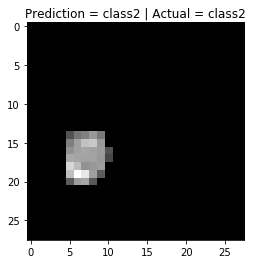

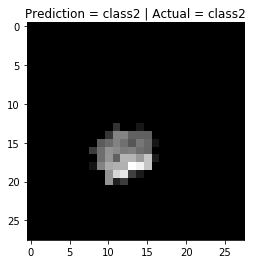

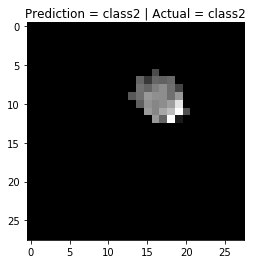

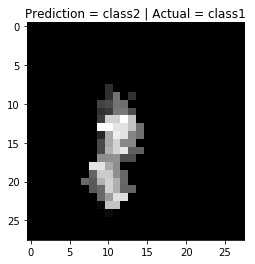

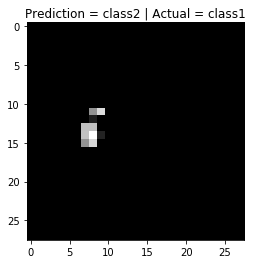

num samples = 59
{'loss': 0.6784676030530767, 'my_metric': 0.6440677966101694}
My_metric is accuracy


In [11]:
#Test
main2(config, resume)